# Colab: a Jupyter Notebook

In [1]:
1+1

2

Hello I am a text: 1+1

In [2]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

apple
banana
cherry


Image

## Install packages (gym, tfagents, tensorflow,....)

#### suppress package warnings, prepare matplotlib, if in colab: load additional packages for rendering

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get update >/dev/null
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    
else:
    #  for local installation
    sys.path.append('..')

#### install easyagents

In [4]:
import sys
if 'google.colab' in sys.modules:
    !pip install easyagents >/dev/null

ERROR: tensorflow-probability 0.8.0 has requirement cloudpickle==1.1.1, but you'll have cloudpickle 1.2.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


# Our Goal

## Step 1: Play the Game

In [5]:
import gym

env = gym.make("CartPole-v1")

In [6]:
env.reset()

array([0.02511467, 0.01004504, 0.04668084, 0.03996452])

In [7]:
env.step(1)

(array([ 0.02531557,  0.20446758,  0.04748013, -0.23763242]), 1.0, False, {})

In [8]:
env.action_space.n

2

In [9]:
env.observation_space.shape[0]

4

In [10]:
done = False
rewards = 0
env.reset()

array([ 0.02971702, -0.03748522, -0.03584526, -0.00759677])

In [11]:
(observation,reward,done,info)=env.step(1)
rewards += reward
print( "rewards=", rewards, "observation=", observation )
if done:
  print( "--- game over ---" )

rewards= 1.0 observation= [ 0.02896731  0.15813198 -0.03599719 -0.31137033]


In [12]:
from random import randint

done = False
rewards = 0
env.reset()
while not done:
  action = randint(0,1)
  (observation,reward,done,info)=env.step(action)
  rewards += reward
  print( "action=", action, "rewards=", rewards, "observation=", observation )
print( "--- game over ---" )

action= 1 rewards= 1.0 observation= [ 0.0319457   0.23544935 -0.00033298 -0.2837482 ]
action= 0 rewards= 2.0 observation= [ 0.03665469  0.04033215 -0.00600794  0.00882969]
action= 1 rewards= 3.0 observation= [ 0.03746133  0.23553974 -0.00583135 -0.28574275]
action= 0 rewards= 4.0 observation= [ 0.04217212  0.04050144 -0.0115462   0.00509533]
action= 0 rewards= 5.0 observation= [ 0.04298215 -0.15445303 -0.01144429  0.29411304]
action= 0 rewards= 6.0 observation= [ 0.03989309 -0.34940997 -0.00556203  0.58316474]
action= 1 rewards= 7.0 observation= [ 0.03290489 -0.15421054  0.00610126  0.2887349 ]
action= 1 rewards= 8.0 observation= [ 0.02982068  0.04082388  0.01187596 -0.00201752]
action= 1 rewards= 9.0 observation= [ 0.03063716  0.23577351  0.01183561 -0.29092991]
action= 0 rewards= 10.0 observation= [0.03535263 0.04048482 0.00601701 0.00546221]
action= 1 rewards= 11.0 observation= [ 0.03616233  0.23551996  0.00612625 -0.28531622]
action= 1 rewards= 12.0 observation= [ 4.08727246e-02  4

# Choose your Weapons

In [13]:
env.reset()
env.step(1)

(array([ 0.01807519,  0.21376853, -0.04889142, -0.34993932]), 1.0, False, {})

In [14]:
env.action_space.n

2

In [15]:
from easyagents.agents import PpoAgent, DqnAgent
from easyagents.callbacks import plot, duration

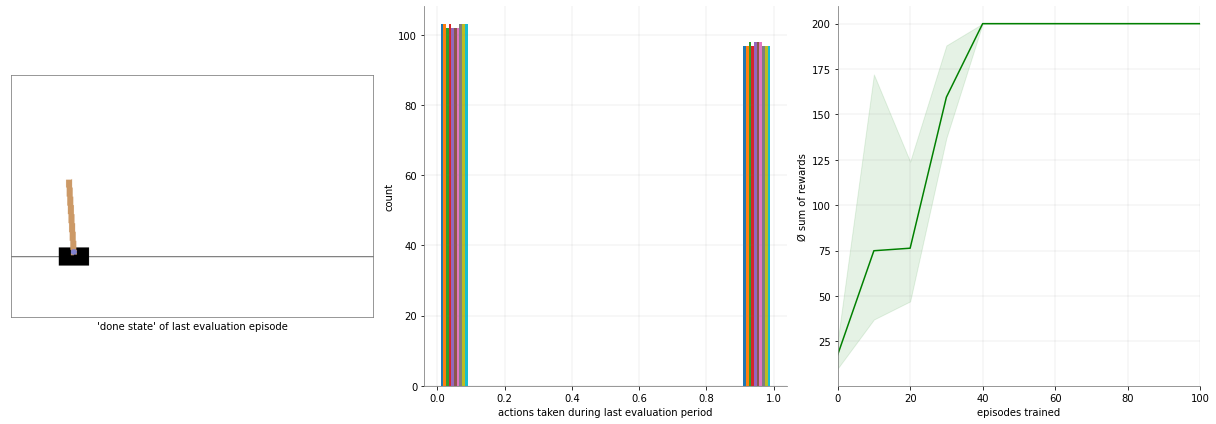

In [16]:
ppoAgent = PpoAgent('CartPole-v0', fc_layers=(100,100))
ppoAgent.train([plot.State(), plot.Actions(), plot.Rewards()], num_iterations=10, num_iterations_between_eval=1)

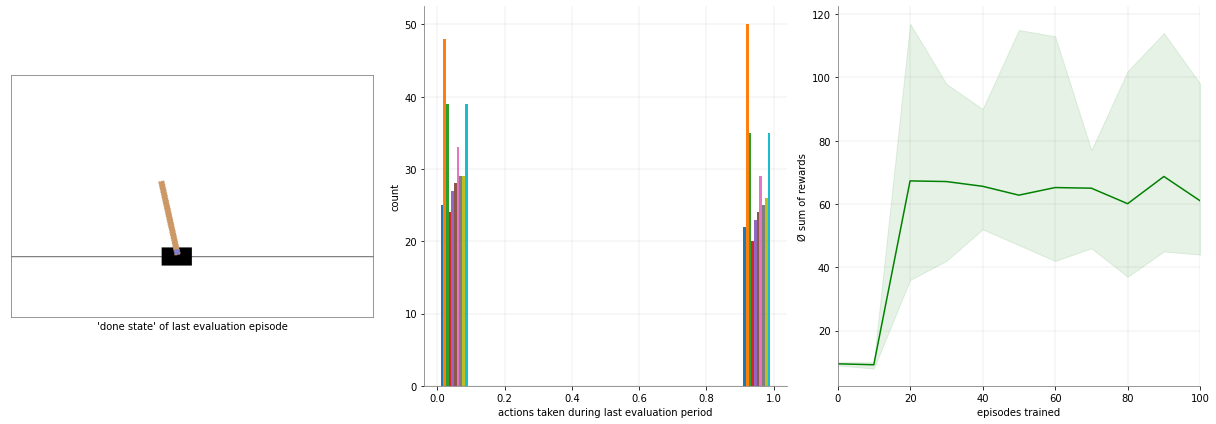

In [17]:
ppoAgent = PpoAgent('CartPole-v0', fc_layers=(10000))
ppoAgent.train([plot.State(), plot.Actions(), plot.Rewards()], num_iterations=10, num_iterations_between_eval=1)

In [18]:
from easyagents.agents import PpoAgent
from easyagents.callbacks import plot, duration

CPU times: user 1min 29s, sys: 2.52 s, total: 1min 32s
Wall time: 1min 28s


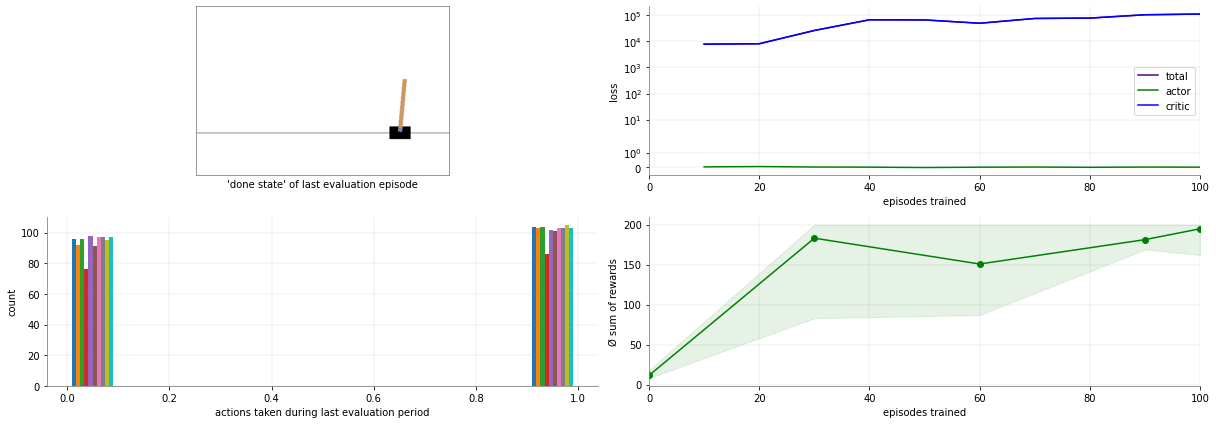

In [19]:
%%time

ppoAgent = PpoAgent('CartPole-v0', fc_layers=(100, 50, 25))
ppoAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()],
               num_iterations=10, num_iterations_between_eval=3)


In [20]:
from easyagents.agents import DqnAgent
from easyagents.callbacks import plot

CPU times: user 6min 47s, sys: 15 s, total: 7min 1s
Wall time: 6min 31s


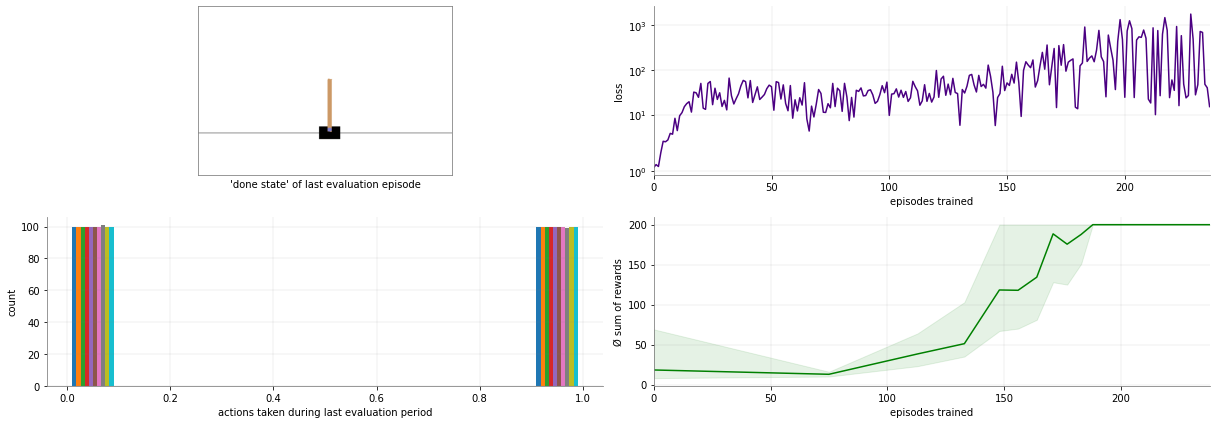

In [21]:
%%time

dqnAgent = DqnAgent('CartPole-v0', fc_layers=(100, ))
dqnAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()], 
               num_iterations=20000, num_iterations_between_eval=1000)